In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.image as mpimg
import tensorflow as tf

In [2]:
with np.load('train_data_np.npz', allow_pickle=False) as npz_file_tr:
    # Load the arrays
    X_tr = npz_file_tr['features']
    y_tr = npz_file_tr['targets']

In [3]:
with np.load('test_data_np.npz', allow_pickle=False) as npz_file_te:
    # Load the arrays
    X_te = npz_file_te['features']
    y_te = npz_file_te['targets']

In [4]:
with np.load('val_data_np.npz', allow_pickle=False) as npz_file_val:
    # Load the arrays
    X_val = npz_file_val['features']
    y_val = npz_file_val['targets']

In [5]:
# Folder list
folder_list = ["bike", "car", "motorcycle", "other", "truck", "van"]

# 2. PCA analysis and clustering

## Apply PCA analysis on the training dataset. Make a scree plot, how many PCA components explain 10%, 20%, …, 90% and 100% of the variance?

### PCA 

We create a PCA with 5 components only as a starting point. Data has to be standardized for a PCA

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Create Standard scaler
scaler = StandardScaler()

# Rescale data
X_standardized = scaler.fit_transform(X_tr)

In [7]:
var_explained = [0.1, 0.2, 0.5, 0.9, 0.9999]

In [8]:
for percent in var_explained: 
    pca = PCA(n_components=percent)
    pca.fit(X_standardized)
    nb = pca.components_.shape[0]
    print(f"for {percent*100} of var explained the number of component is {nb}")

for 10.0 of var explained the number of component is 2
for 20.0 of var explained the number of component is 3
for 50.0 of var explained the number of component is 25
for 90.0 of var explained the number of component is 150
for 99.99 of var explained the number of component is 279


We have fewer samples (280) than features (1280), therefore, the rank of the data is determined by the number of samples in our case. the number of component is limited to 279

### Scree plots
We create a screeplot with 50% of the variance explained and 25 components.

In [9]:
# Create scree plot with 100% of variance explained
pca = PCA(n_components=25)

# Apply PCA to rescaled data
pca.fit(X_standardized)

PCA(n_components=25)

In [10]:
# Proportion of variance explained
pve = pca.explained_variance_ratio_

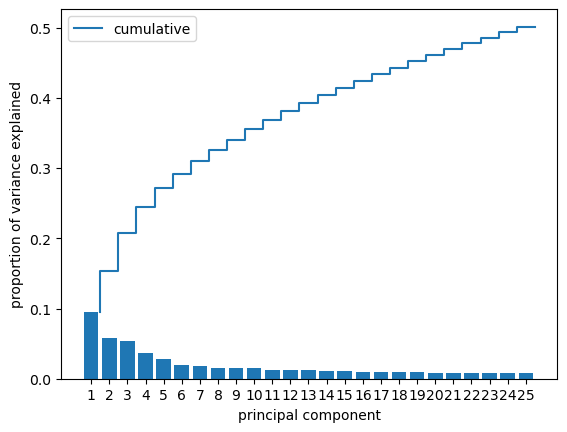

In [11]:
import numpy as np

# Create bar plot
xcor = np.arange(1, len(pve) + 1)  # 1,2,..,n_components
plt.bar(xcor, pve)
plt.xticks(xcor)

# Add cumulative sum
pve_cumsum = np.cumsum(pve)
plt.step(
    xcor + 0.5,  # 1.5,2.5,..,n_components+0.5
    pve_cumsum,  # Cumulative sum
    label="cumulative",
)

# Add labels
plt.xlabel("principal component")
plt.ylabel("proportion of variance explained")
plt.legend()
plt.show()

*Comments:* We can see that the first 5-6 components explain up to 30 percent of the variance, then the impact of additional components decreases

### After transforming the training dataset using the first two PCA components, visualize the transformed data on a 2D-plot and use 6 different colors to designate the 6 categories. What can you say about the results?

In [12]:
# tranforming the dataset using the 2 first PCA
pca_2 = PCA(n_components=2)
X_2d = pca_2.fit_transform(X_standardized)
y = y_tr.flatten()

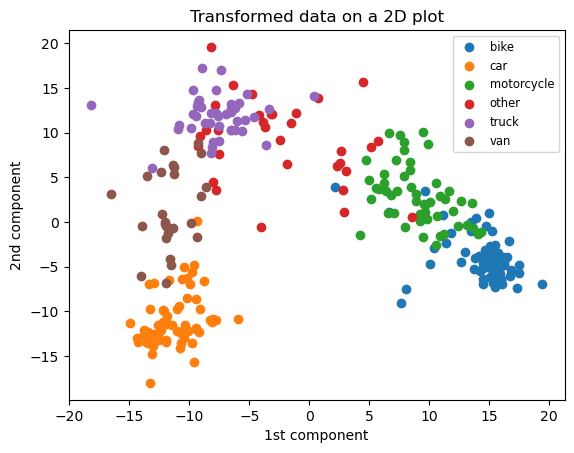

In [13]:
# Plot each category
for kind in folder_list:
    # category samples of this type
    idx = (y == kind)

    # Plot their components
    plt.scatter(X_2d[idx, 0], X_2d[idx, 1], label=format(kind))

# Labels and legend
plt.title("Transformed data on a 2D plot")
plt.legend(loc="best", fontsize="small")
plt.xlabel("1st component")
plt.ylabel("2nd component")
plt.show()

*Comment*: We can see that data points are grouped, meaning that each category has a specific range of values in the 1st and 2nd component. Consequently it will be easier to determine the caterogy of a picture according to its components. Bikes and morocycles are located on the same right side of the plot. Vans and truck are close to each others.

### On the 2D transformed training data, apply k-means clustering with k equals 6. Plot the same 2D-plot as above but this time use the colors to distinguish between the six clusters obtained by k-means. Do the 6 clusters of k-means align with the 6 categories from above?

In [14]:
from sklearn.cluster import KMeans

In [15]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(X_2d)

KMeans(n_clusters=6)

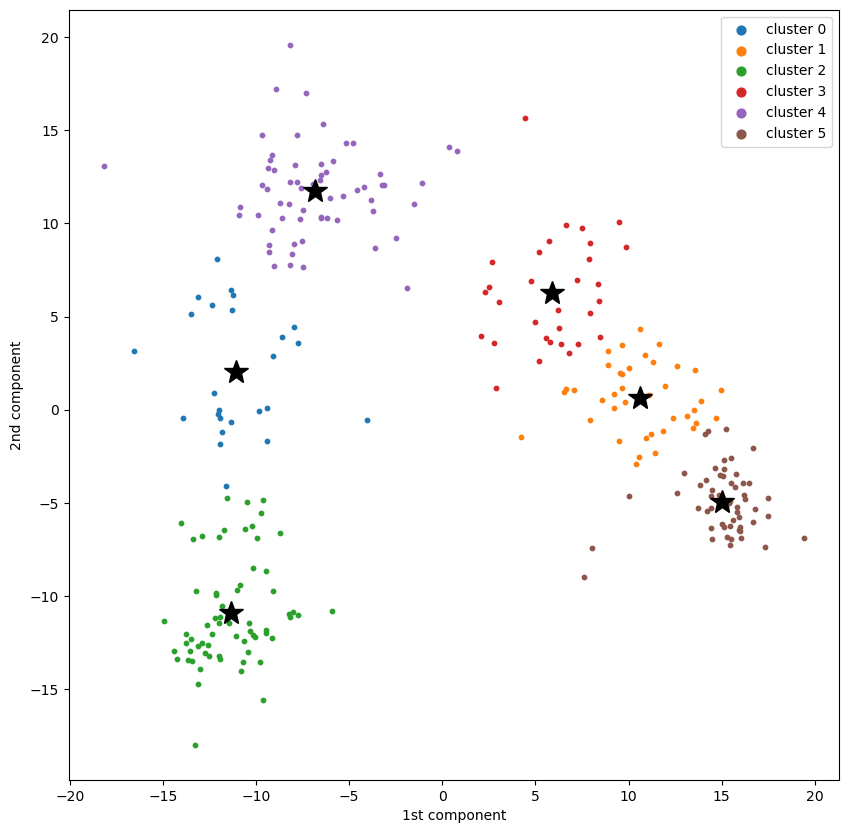

In [16]:
# Create figure
plt.figure(figsize=(10, 10))  # figure 10 by 10 inches

# Same scale for the x- and y-axis
plt.gca().set_aspect("equal", adjustable="box")

# Plot each cluster
for cluster in range(kmeans.n_clusters):
    # Get points in this cluster
    idx = kmeans.labels_ == cluster
    x1, x2 = X_2d[idx, 0], X_2d[idx, 1]

    # Plot points
    plt.scatter(x1, x2, s=10, label="cluster {}".format(cluster))

    # Plot centroid
    centroid = kmeans.cluster_centers_[cluster]
    plt.plot(centroid[0], centroid[1], marker="*", color="black", markersize=18)

# Add labels
plt.legend(markerscale=2)  # larger (x2) markers
plt.xlabel("1st component")
plt.ylabel("2nd component")
plt.show()

*Comments* We can see that the Kmeans model managed to identify clusters according to their locations on latitude and longitude. the plot aligns quite well with the previous plot.

### Using the first two PCA components obtained form the training dataset, transform the test dataset. Visualize the transformed data on a 2D-plot and use 6 different colors to designate the 6 categories. Based on this visualization, how many sample in the test dataset you think might be hard to classify?


We are standardizing the test set using scaler before tranforming the data into a 2 components based set using the PCA. Finally, we are using Kmeans to identify the 6 categories.

In [17]:
# Rescale data using scaler previously created
X_test_standardized = scaler.transform(X_te)


In [18]:
# Creation of the 2 components based on the test set with pca_2 fitted earlier
X_2d_test = pca_2.transform(X_test_standardized)

In [19]:
# Creation of the model 
kmeans = KMeans(n_clusters=6)
kmeans.fit(X_2d_test)

KMeans(n_clusters=6)

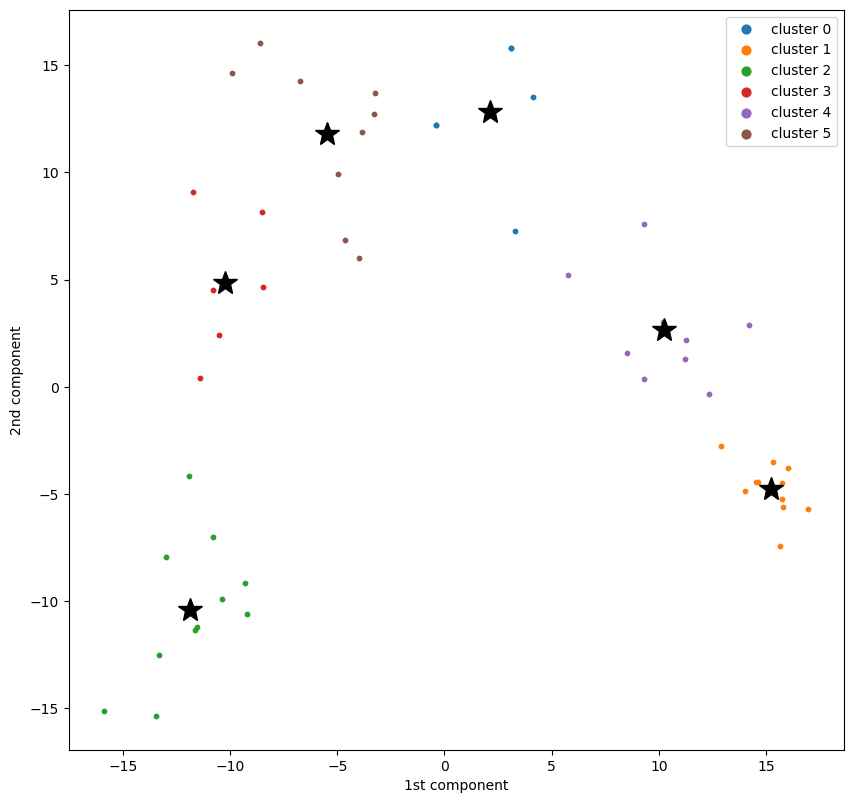

In [20]:
# Create figure
plt.figure(figsize=(10, 10))  # figure 10 by 10 inches

# Same scale for the x- and y-axis
plt.gca().set_aspect("equal", adjustable="box")

# Plot each cluster
for cluster in range(kmeans.n_clusters):
    # Get points in this cluster
    idx = kmeans.labels_ == cluster
    x1, x2 = X_2d_test[idx, 0], X_2d_test[idx, 1]

    # Plot points
    plt.scatter(x1, x2, s=10, label="cluster {}".format(cluster))

    # Plot centroid
    centroid = kmeans.cluster_centers_[cluster]
    plt.plot(centroid[0], centroid[1], marker="*", color="black", markersize=18)

# Add labels
plt.legend(markerscale=2)  # larger (x2) markers
plt.xlabel("1st component")
plt.ylabel("2nd component")
plt.show()

*Comments:* We can see that the centroids 0 has moved higher in the last plot compared to the previous plot. Consequently, this change will have a major impact in classifying the clusters 0 and 5 which are now close to each others. 
Overall all, the model workd well in classifying data points. 